In [2]:
import osmnx

In [3]:
way_tags = [
    'bridge',
    'tunnel',
    'highway',
    'footway',
    'lanes',
    'maxspeed',
    'name',
    'oneway',
    'noexit',
    'abutters',
    'embedded_rails',
    'incline',
    'junction',
    'lit',
    'overtaking',
    'parking:condition',
    'parking:lane',
    'smoothness',
    'surface',
    'tactile_paving',
    'tracktype',
    'traffic_calming',
    'turn',
    'turn:lanes',
    'abutters',  # commercial / industrial / mixed / residential / retail etc. https://wiki.openstreetmap.org/wiki/Key:abutters
    'bicycle_road',
    'embedded_rails',
    'place'
]
node_tags = [
    'ele',  # elevation
    'highway',  # turning circle, traffic signals, etc
    'ref',  # reference id?
    'barrier',
    'amenity',  # school, restaurant, parking, etc
    'emergency',  # firestation, hospital, etc
    'incline',
    'place'
]

osmnx.utils.config(
    use_cache=True,
    useful_tags_way=way_tags,
    useful_tags_node=node_tags,    
)

In [4]:
G = osmnx.graph_from_place('Takoma Park, MD', network_type='all', simplify=False)
G = osmnx.add_edge_bearings(G)

In [5]:
list(G.nodes())[0]

49129369

In [6]:
from collections import Counter
c = Counter()
for n in G.nodes:
    #if 'highway' in G.nodes[n]:
    #    print(G.nodes[n], G.out_degree[n], G.in_degree[n])  # todo: get names of roadways which nodes connect
    for e in G.edges(n):
        if 'highway' in G[e[0]][e[1]][0]:
            c.update(
                [G[e[0]][e[1]][0]['highway']]
            )
        #c.update(G[e[0]][e[1]][0].keys())
        #try:
        #    c.update(G[e[0]][e[1]][1].keys())
        #except KeyError:
        #    pass
        # print(G[e[0]][e[1]])

print(c)
    

Counter({'service': 2586, 'residential': 2374, 'footway': 1312, 'tertiary': 460, 'cycleway': 362, 'secondary': 343, 'primary': 192, 'primary_link': 49, 'steps': 34, 'unclassified': 13, 'secondary_link': 8, 'path': 4})


In [7]:
c = Counter()
for n in G.nodes(data=True):
    c.update(n[1].keys())
    if 'highway' in n[1]:
        print(n[1])
    # print(type(n[1]))
    
    #print(G.nodes[n[0]])
    #break
    # info = G.nodes[n]
    #print(info)    
    # break
# type(G.nodes(n))
print(c)

{'y': 38.981082, 'x': -76.990692, 'osmid': 49153487, 'highway': 'crossing'}
{'y': 38.977298, 'x': -76.997563, 'osmid': 49154967, 'highway': 'turning_circle'}
{'y': 38.985046, 'x': -76.989624, 'osmid': 49159709, 'highway': 'mini_roundabout'}
{'y': 38.9854873, 'x': -77.0037371, 'osmid': 49160014, 'highway': 'stop'}
{'y': 38.9710621, 'x': -76.9985992, 'osmid': 49170010, 'highway': 'traffic_signals'}
{'y': 38.9802824, 'x': -76.9992367, 'osmid': 49170205, 'highway': 'turning_circle'}
{'y': 38.9746425, 'x': -77.0121974, 'osmid': 49173081, 'highway': 'traffic_signals'}
{'y': 38.97528, 'x': -77.009933, 'osmid': 49173091, 'highway': 'traffic_signals'}
{'y': 38.975734, 'x': -77.009201, 'osmid': 49173097, 'highway': 'crossing'}
{'y': 38.977775, 'x': -77.007385, 'osmid': 49173101, 'highway': 'traffic_signals'}
{'y': 38.978031, 'x': -77.006187, 'osmid': 49173107, 'highway': 'traffic_signals'}
{'y': 38.984766, 'x': -76.9985361, 'osmid': 49173156, 'highway': 'traffic_signals'}
{'y': 38.987342, 'x': -

In [8]:
for e in G.edges:
    if 'incline' in G[e[0]][e[1]][e[2]]:
        print(G[e[0]][e[1]][e[2]])
    

{'osmid': 830603738, 'highway': 'footway', 'footway': 'sidewalk', 'incline': 'yes', 'surface': 'concrete', 'oneway': False, 'length': 3.017, 'bearing': 257.7}
{'osmid': 830603738, 'highway': 'footway', 'footway': 'sidewalk', 'incline': 'yes', 'surface': 'concrete', 'oneway': False, 'length': 4.551, 'bearing': 92.4}
{'osmid': 830603738, 'highway': 'footway', 'footway': 'sidewalk', 'incline': 'yes', 'surface': 'concrete', 'oneway': False, 'length': 3.797, 'bearing': 79.5}
{'osmid': 830603738, 'highway': 'footway', 'footway': 'sidewalk', 'incline': 'yes', 'surface': 'concrete', 'oneway': False, 'length': 4.551, 'bearing': 272.4}
{'osmid': 830603738, 'highway': 'footway', 'footway': 'sidewalk', 'incline': 'yes', 'surface': 'concrete', 'oneway': False, 'length': 16.807, 'bearing': 30.3}
{'osmid': 830603738, 'highway': 'footway', 'footway': 'sidewalk', 'incline': 'yes', 'surface': 'concrete', 'oneway': False, 'length': 1.563, 'bearing': 248.3}
{'osmid': 830603738, 'highway': 'footway', 'foot

In [9]:
for n in G:
    print(n)
    
    break

49129369


In [28]:
print(n)
G.nodes[n]

49129369


{'y': 38.9818917, 'x': -77.0166139, 'osmid': 49129369}

In [20]:
print(n)
print(G[n])

49129369
{49129371: {0: {'osmid': 5963804, 'highway': 'residential', 'name': 'Cleveland Avenue', 'oneway': False, 'length': 62.398, 'bearing': 275.0}}}


['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'all_oneway',
 'bidirectional_network_types',
 'cache_folder',
 'data_folder',
 'default_accept_language',
 'default_access',
 'default_crs',
 'default_referer',
 'default_user_agent',
 'elevation_provider',
 'imgs_folder',
 'lg',
 'log_console',
 'log_file',
 'log_filename',
 'log_level',
 'log_name',
 'logs_folder',
 'max_query_area_size',
 'memory',
 'nominatim_endpoint',
 'nominatim_key',
 'osm_xml_node_attrs',
 'osm_xml_node_tags',
 'osm_xml_way_attrs',
 'osm_xml_way_tags',
 'overpass_endpoint',
 'overpass_settings',
 'timeout',
 'use_cache',
 'useful_tags_node',
 'useful_tags_way']

In [37]:
osmnx.settings.osm_xml_node_attrs + ['ele']


['id', 'timestamp', 'uid', 'user', 'version', 'changeset', 'lat', 'lon']

In [6]:
from dot.tiles import get_cropped_centered_img
from dotenv import load_dotenv
import os

load_dotenv()

True

In [10]:
img = get_cropped_centered_img(38.988941, -76.9878056, mapbox_token=os.getenv('MAPBOX_TOKEN'))

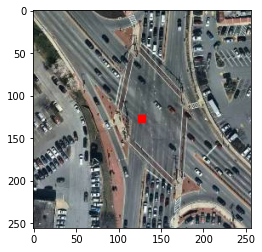

In [11]:
import matplotlib.pylab as plt

plt.imshow(img)